In [1]:
import os
import matplotlib
import numpy             as     np
import pandas            as     pd
import scipy.optimize    as     opt
import matplotlib.pyplot as     plt
from   matplotlib        import font_manager
from   fractions         import Fraction
import pickle
import warnings
import sys

In [2]:
# Matplotlib rc parameters modification

plt.rcParams.update({
  "figure.max_open_warning": 0,
  "text.usetex": True,
  "text.latex.preamble": r"\usepackage{type1cm}",
  "figure.autolayout": True,
  "font.family": "STIXGeneral",
  "mathtext.fontset": "stix",
  "font.size":        8,
  "xtick.labelsize":  12,
  "ytick.labelsize":  12,
  "lines.linewidth":  1,
  "lines.markersize": 5
})
plt.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"

In [39]:
import os
import numpy as np
import random

#topDir      = "/Users/rahul/Documents/Simulations/"
#topDir      = "/Users/rahul/Documents/Simulations/"
topDir      = "/media/rahul/Rahul_2TB/high_bidispersity/"

ranSeedFile = "random_seed.dat"
intFile     = "int_random_seed_params_stress100r_shear.dat"
contFile    = 'contacts.txt'

NP          = [1000]

#run         = {500:8,1000:4,2000:2,4000:1}
run         = {500:8,1000:1,2000:2,4000:1}

phi         = [0.75]

ar          = [1.4]
#ar          = [1.0]

    
for ii in range(len(NP)):
    for j in range(len(phi)):
        phir = '{:.3f}'.format(phi[j]) if len(str(phi[j]).split('.')[1])>2 else '{:.2f}'.format(phi[j])
        for k in range(len(ar)):
            dataname=topDir+'NP_'+str(NP[ii])+'/phi_'+phir+'/ar_'+str(ar[k])+'/Vr_0.5'
            if os.path.exists(dataname):
                for l in range (run[NP[ii]]):
                    ranFile = open(f'{dataname}/run_{l+1}/{ranSeedFile}', 'r')

                    if ar[k] == 1:
                        particleSize = [1]*(int(NP[ii]/2)) + [2]*(int(NP[ii]/2))
                        random.shuffle(particleSize)
                        #painting particles randomly in two colours for monodisperse case
                    else:
                        particleSize = np.loadtxt(ranFile,usecols=3) # reading only column 3 which has particle size
                        ranFile.close()
                        
                    #%% reading interaction file
                    # storing the interactions for each timestep in a list

                    hashCounter=0
                    temp=[]
                    contactList=[] # list with interaction parameters for each element at each timestep

                    interFile = open(f'{dataname}/run_{l+1}/{intFile}', 'r')
                    fileLines = interFile.readlines()[27:] # skipping the comment lines
                    for line in fileLines:
                        if not line.split()[0] == '#':
                            lineList = [float(value) for value in line.split()]
                            temp.append(lineList)
                        else:
                            hashCounter += 1 # checking if counter reaches 7 (7 lines of comments after every timestep data)
                            if hashCounter == 7: 
                                contactList.append(np.array(temp))
                                temp = []
                                hashCounter = 0
                    interFile.close()
                    
                    contactAngle = [] # total number of particles in frictional contacts
                    for sampleList in contactList:
                        timeStepContactAngle = [] # index of particles in contact
                        for i in range (sampleList.shape[0]):
                            if int(sampleList[i,10]) == 2:
                                thetaRad = np.arctan2(sampleList[i,4],sampleList[i,2])
                                timeStepContactAngle.append(thetaRad)
                                if thetaRad < 0:
                                    timeStepContactAngle.append(np.pi - abs(thetaRad))
                                else:
                                    timeStepContactAngle.append(thetaRad - np.pi)
                                    
                        contactAngle.append(timeStepContactAngle) # nested list of all contact angles
                    
                    #for total contacts 
                    conFile  = open(f'{dataname}/run_{l+1}/{contFile}', 'r')
                    contData = np.loadtxt(conFile)
                    conFile.close()
                    
                    zlist = [ a for a in contData[:,0]]

In [50]:
off = 100
contactAngleList = [i for sub in contactAngle[off:] for i in sub] #

eo = np.mean(zlist[off:]) # mean number of steady state contatcs

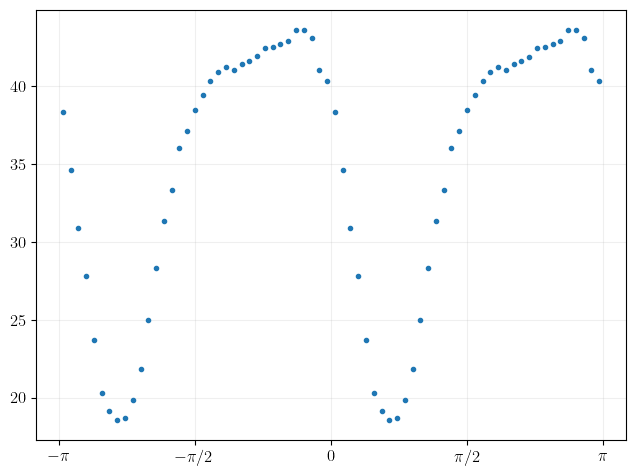

In [61]:
counts, bin_edges = np.histogram(contactAngleList, bins = 70)

# Calculate the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

#plt.bar(bin_centers, counts/(2000-100)/eo, width=bin_edges[1] - bin_edges[0])
plt.plot(bin_centers, counts/(2000-100), 'o', markersize=3) # histogram using the count and bins

xticks = [-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi]
xtick_labels = [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$']
plt.xticks(xticks, xtick_labels)

plt.grid(which='Both', alpha=0.2)
plt.show()

In [15]:
math.degrees(np.arctan2(0,1))

0.0

In [26]:
20000/np.mean(zlist)

8.28907657200265

In [ ]:
ec = (1/np.pi) * (1 + )

In [19]:
# script for histogram of angular contacts

import os
import numpy as np
import random

topDir      = "/media/rahul/Rahul_2TB/high_bidispersity/"

ranSeedFile = "random_seed.dat"
intFile     = "int_random_seed_params_stress100r_shear.dat"
contFile    = 'contacts.txt'

NP          = [1000]

run         = {500:8,1000:4,2000:2,4000:1}

#phi         = [0.75]

ar          = [1.0, 1.4, 1.8, 2.0, 4.0]

def angularContacts(phii, figsave = False):
    plt.clf()
    cmap = matplotlib.colormaps['viridis_r'] #color scheme
    
    for ii in range(len(NP)):
            phii = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
            contactAngleAllRuns = []
            for k in range(len(ar)):
                dataname=topDir+'NP_'+str(NP[ii])+'/phi_'+phii+'/ar_'+str(ar[k])+'/Vr_0.5'
                if os.path.exists(dataname):
                    for l in range (run[NP[ii]]):
                        ranFile = open(f'{dataname}/run_{l+1}/{ranSeedFile}', 'r')

                        if ar[k] == 1:
                            particleSize = [1]*(int(NP[ii]/2)) + [2]*(int(NP[ii]/2))
                            random.shuffle(particleSize)
                            #painting particles randomly in two colours for monodisperse case
                        else:
                            particleSize = np.loadtxt(ranFile,usecols=3) # reading only column 3 which has particle size
                            ranFile.close()
                            
                        #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                        
                        # reading interaction file
                        # storing the interactions for each timestep in a list
                        hashCounter=0
                        temp=[]
                        contactList=[] # list with interaction parameters for each element at each timestep

                        interFile = open(f'{dataname}/run_{l+1}/{intFile}', 'r')
                        fileLines = interFile.readlines()[27:] # skipping the comment lines
                        for line in fileLines:
                            if not line.split()[0] == '#':
                                lineList = [float(value) for value in line.split()]
                                temp.append(lineList)
                            else:
                                hashCounter += 1 # checking if counter reaches 7 (7 lines of comments after every timestep data)
                                if hashCounter == 7: 
                                    contactList.append(np.array(temp))
                                    temp = []
                                    hashCounter = 0
                        interFile.close()

                        #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                        
                        contactAngle = [] # total number of particles in frictional contacts
                        for sampleList in contactList:
                            timeStepContactAngle = [] # index of particles in contact
                            for i in range (sampleList.shape[0]):
                                if int(sampleList[i,10]) == 2:
                                    thetaRad = np.arctan2(sampleList[i,4],sampleList[i,2])
                                    timeStepContactAngle.append(thetaRad)
                                    if thetaRad < 0:
                                        timeStepContactAngle.append(np.pi - abs(thetaRad))
                                    else:
                                        timeStepContactAngle.append(thetaRad - np.pi)

                            contactAngle.append(timeStepContactAngle) # nested list of all contact angles
                        
                        #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                        
                        #for total contacts 
                        #conFile  = open(f'{dataname}/run_{l+1}/{contFile}', 'r')
                        #contData = np.loadtxt(conFile)
                        #conFile.close()
                        #zlist = [ a for a in contData[:,0]]
                        
                        off = 100
                        contactAngleList = [i for sub in contactAngle[off:] for i in sub]
                        contactAngleAllRuns.append(contactAngleList)
                    
                    allContactAngles = [i for sub in contactAngleAllRuns for i in sub]
                    counts, bin_edges = np.histogram(allContactAngles, bins = 70)
                    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
                    # histogram using the count and bins
                    plt.plot(bin_centers, counts/(len(contactAngle)-off), 'o', markersize=3, label=r'$\delta$' + f' = {ar[k]}',color=cmap((k+1)/len(ar))) 

    xticks = [-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi]
    xtick_labels = [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$']
    plt.xticks(xticks, xtick_labels)
    plt.title(fr"$\phi = {phii}$", fontsize=18)
    plt.xlabel('Contact Angle', fontsize=14,fontstyle='italic')
    plt.ylabel(r'$E_c$', fontsize=14,fontstyle='italic')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=14)
    plt.legend(fontsize=10, labelspacing=1,borderpad=1)

    plt.grid(which='Both', alpha=0.2)
    
    plt.tight_layout()
    if figsave:
        figFormat=".pdf"
        fig_save_path = "/home/rahul/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/figures"
        plt.savefig(fig_save_path+'/contactAngles_NP_'+str(1000)+'_phi_'+str(phii)+figFormat, bbox_inches="tight",dpi=500)

    plt.show()

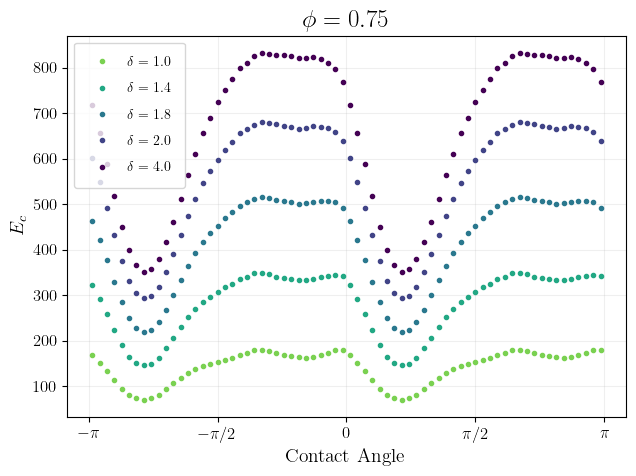

In [13]:
angularContacts(0.75)

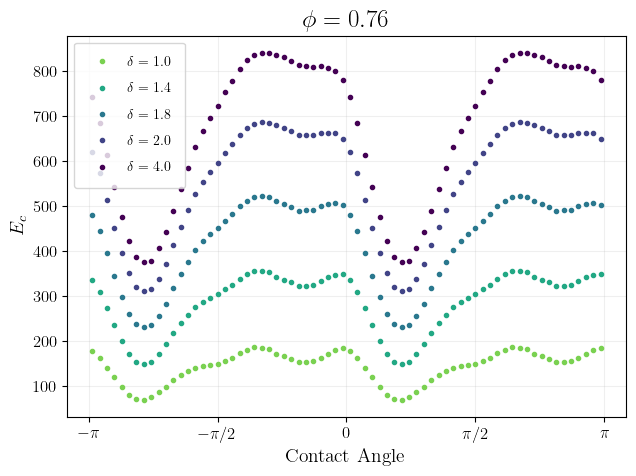

In [12]:
angularContacts(0.76)

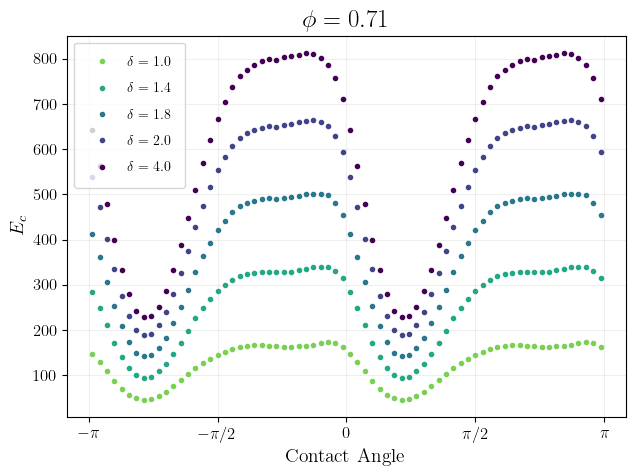

In [18]:
angularContacts(0.71)

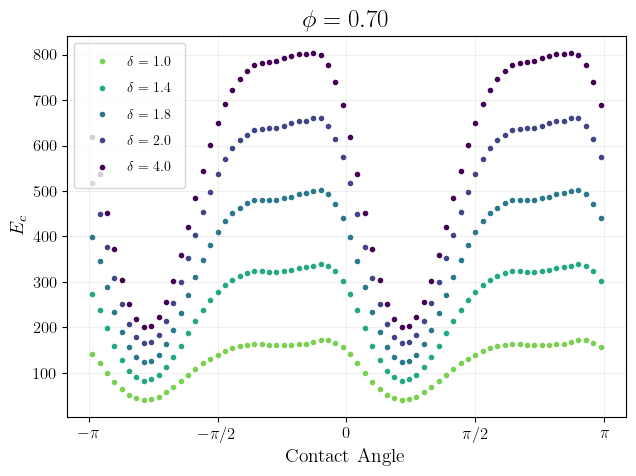

In [20]:
angularContacts(0.70)

In [ ]:
# script for histogram of contact forces (Normal)


import os
import numpy as np
import random

topDir      = "/media/rahul/Rahul_2TB/high_bidispersity/"

ranSeedFile = "random_seed.dat"
intFile     = "int_random_seed_params_stress100r_shear.dat"
contFile    = 'contacts.txt'

NP          = [1000]

run         = {500:8,1000:4,2000:2,4000:1}

#phi         = [0.75]

ar          = [1.0, 1.4, 1.8, 2.0, 4.0]

def contactForcesN(phii, figsave = False):
    plt.clf()
    cmap = matplotlib.colormaps['viridis_r'] #color scheme
    
    for ii in range(len(NP)):
            phii = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
            contactForceNAllRuns = []
            for k in range(len(ar)):
                dataname=topDir+'NP_'+str(NP[ii])+'/phi_'+phii+'/ar_'+str(ar[k])+'/Vr_0.5'
                if os.path.exists(dataname):
                    for l in range (run[NP[ii]]):
                        ranFile = open(f'{dataname}/run_{l+1}/{ranSeedFile}', 'r')

                        if ar[k] == 1:
                            particleSize = [1]*(int(NP[ii]/2)) + [2]*(int(NP[ii]/2))
                            random.shuffle(particleSize)
                            #painting particles randomly in two colours for monodisperse case
                        else:
                            particleSize = np.loadtxt(ranFile,usecols=3) # reading only column 3 which has particle size
                            ranFile.close()
                            
                        #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                        
                        # reading interaction file
                        # storing the interactions for each timestep in a list
                        hashCounter=0
                        temp=[]
                        contactList=[] # list with interaction parameters for each element at each timestep

                        interFile = open(f'{dataname}/run_{l+1}/{intFile}', 'r')
                        fileLines = interFile.readlines()[27:] # skipping the comment lines
                        for line in fileLines:
                            if not line.split()[0] == '#':
                                lineList = [float(value) for value in line.split()]
                                temp.append(lineList)
                            else:
                                hashCounter += 1 # checking if counter reaches 7 (7 lines of comments after every timestep data)
                                if hashCounter == 7: 
                                    contactList.append(np.array(temp))
                                    temp = []
                                    hashCounter = 0
                        interFile.close()

                        #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                        
                        contactForceN = [] # total number of particles in frictional contacts
                        for sampleList in contactList:
                            timeStepContactFornceN = [] # index of particles in contact
                            for i in range (sampleList.shape[0]):
                                timeStepContactFornceN.append(sampleList[i,11])

                            contactForceN.append(timeStepContactFornceN) # nested list of all contact angles
                        
                        #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                        
                        #for total contacts 
                        #conFile  = open(f'{dataname}/run_{l+1}/{contFile}', 'r')
                        #contData = np.loadtxt(conFile)
                        #conFile.close()
                        #zlist = [ a for a in contData[:,0]]
                        
                        off = 100
                        contactForceNList = [i for sub in contactForceN[off:] for i in sub]
                        contactForceNAllRuns.append(contactForceNList)
                    
                    allContactForcesN = [i for sub in contactForceNAllRuns for i in sub]
                    counts, bin_edges = np.histogram(allContactForcesN, bins = 70)
                    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
                    # histogram using the count and bins
                    plt.plot(bin_centers, counts/(len(contactForceN)-off), 'o', markersize=3, label=r'$\delta$' + f' = {ar[k]}',color=cmap((k+1)/len(ar))) 

    xticks = [-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi]
    xtick_labels = [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$']
    plt.xticks(xticks, xtick_labels)
    plt.title(fr"$\phi = {phii}$", fontsize=18)
    plt.xlabel('Contact Angle', fontsize=14,fontstyle='italic')
    plt.ylabel(r'$E_c$', fontsize=14,fontstyle='italic')

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=14)
    plt.legend(fontsize=10, labelspacing=1,borderpad=1)

    plt.grid(which='Both', alpha=0.2)
    
    plt.tight_layout()
    if figsave:
        figFormat=".pdf"
        fig_save_path = "/home/rahul/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/figures"
        plt.savefig(fig_save_path+'/contactAngles_NP_'+str(1000)+'_phi_'+str(phii)+figFormat, bbox_inches="tight",dpi=500)

    plt.show()

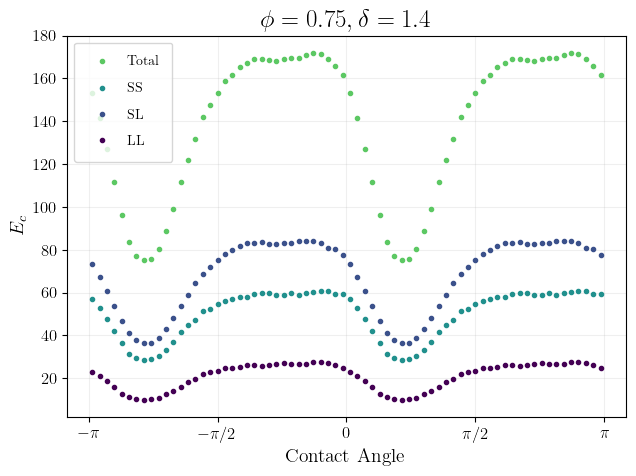

In [39]:
# script for histogram of angular contacts for small-small, small-large and large-large

import os
import numpy as np
import random

topDir      = "/media/rahul/Rahul_2TB/high_bidispersity/"

ranSeedFile = "random_seed.dat"
intFile     = "int_random_seed_params_stress100r_shear.dat"
contFile    = 'contacts.txt'

run         = {500:8,1000:4,2000:2,4000:1}

#def angularContactsSize(phii, arr, figsave = False):

phii = 0.75
arr = 1.4
npp = 1000

plt.clf()
cmap = matplotlib.colormaps['viridis_r'] #color scheme

off = 100

phii = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
contactAngleAllRuns   = [[] for _ in range(4)]
sizePair = [ 'Total', 'SS', 'SL', 'LL']

dataname=topDir+'NP_'+str(npp)+'/phi_'+phii+'/ar_'+str(arr)+'/Vr_0.5'
if os.path.exists(dataname):
    for l in range (run[npp]):
        ranFile = open(f'{dataname}/run_{l+1}/{ranSeedFile}', 'r')

        if arr == 1:
            particleSize = [1]*(int(npp/2)) + [2]*(int(npp/2))
            random.shuffle(particleSize)
            #painting particles randomly in two colours for monodisperse case
        else:
            particleSize = np.loadtxt(ranFile,usecols=3) # reading only column 3 which has particle size
            ranFile.close()

        #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

        # reading interaction file
        # storing the interactions for each timestep in a list
        hashCounter=0
        temp=[]
        contactList=[] # list with interaction parameters for each element at each timestep

        interFile = open(f'{dataname}/run_{l+1}/{intFile}', 'r')
        fileLines = interFile.readlines()[27:] # skipping the comment lines
        for line in fileLines:
            if not line.split()[0] == '#':
                lineList = [float(value) for value in line.split()]
                temp.append(lineList)
            else:
                hashCounter += 1 # checking if counter reaches 7 (7 lines of comments after every timestep data)
                if hashCounter == 7: 
                    contactList.append(np.array(temp))
                    temp = []
                    hashCounter = 0
        interFile.close()

        #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

        # total angluar contacts

        contactAngleTotal = [] # total number of particles in frictional contacts
        for sampleList in contactList:
            timeStepContactAngle = [] # index of particles in contact
            for i in range (sampleList.shape[0]):
                if int(sampleList[i,10]) == 2:
                    thetaRad = np.arctan2(sampleList[i,4],sampleList[i,2])
                    timeStepContactAngle.append(thetaRad)
                    if thetaRad < 0:
                        timeStepContactAngle.append(np.pi - abs(thetaRad))
                    else:
                        timeStepContactAngle.append(thetaRad - np.pi)

            contactAngleTotal.append(timeStepContactAngle) # nested list of all contact angles

        contactAngleList = [i for sub in contactAngleTotal[off:] for i in sub]
        contactAngleAllRuns[0].append(contactAngleList)

        #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

        # small-small angluar contacts

        contactAngleTotal = [] # total number of particles in frictional contacts
        for sampleList in contactList:
            timeStepContactAngle = [] # index of particles in contact
            for i in range (sampleList.shape[0]):
                if (particleSize[int(sampleList[i,0])] == 1 and particleSize[int(sampleList[i,1])] == 1) and int(sampleList[i,10]) == 2:
                    thetaRad = np.arctan2(sampleList[i,4],sampleList[i,2])
                    timeStepContactAngle.append(thetaRad)
                    if thetaRad < 0:
                        timeStepContactAngle.append(np.pi - abs(thetaRad))
                    else:
                        timeStepContactAngle.append(thetaRad - np.pi)

            contactAngleTotal.append(timeStepContactAngle) # nested list of all contact angles

        contactAngleList = [i for sub in contactAngleTotal[off:] for i in sub]
        contactAngleAllRuns[1].append(contactAngleList)

        #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

        # small-large angluar contacts

        contactAngleTotal = [] # total number of particles in frictional contacts
        for sampleList in contactList:
            timeStepContactAngle = [] # index of particles in contact
            for i in range (sampleList.shape[0]):
                if (particleSize[int(sampleList[i, 0])] != particleSize[int(sampleList[i, 1])]) and int(sampleList[i, 10]) == 2:
                    thetaRad = np.arctan2(sampleList[i,4],sampleList[i,2])
                    timeStepContactAngle.append(thetaRad)
                    if thetaRad < 0:
                        timeStepContactAngle.append(np.pi - abs(thetaRad))
                    else:
                        timeStepContactAngle.append(thetaRad - np.pi)

            contactAngleTotal.append(timeStepContactAngle) # nested list of all contact angles

        contactAngleList = [i for sub in contactAngleTotal[off:] for i in sub]
        contactAngleAllRuns[2].append(contactAngleList)

        #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
            
        # large-large angluar contacts
        
        contactAngleTotal = [] # total number of particles in frictional contacts
        for sampleList in contactList:
            timeStepContactAngle = [] # index of particles in contact
            for i in range (sampleList.shape[0]):
                if (particleSize[int(sampleList[i,0])] > 1 and particleSize[int(sampleList[i,1])] > 1) and int(sampleList[i,10]) == 2:
                    thetaRad = np.arctan2(sampleList[i,4],sampleList[i,2])
                    timeStepContactAngle.append(thetaRad)
                    if thetaRad < 0:
                        timeStepContactAngle.append(np.pi - abs(thetaRad))
                    else:
                        timeStepContactAngle.append(thetaRad - np.pi)

            contactAngleTotal.append(timeStepContactAngle) # nested list of all contact angles
        
        contactAngleList = [i for sub in contactAngleTotal[off:] for i in sub]
        contactAngleAllRuns[3].append(contactAngleList)

for ii in range(len(contactAngleAllRuns)):
    allContactAngles   = [i for sub in contactAngleAllRuns[ii] for i in sub]
    counts, bin_edges  = np.histogram(allContactAngles, bins = 70)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_centers, counts/(len(contactAngleTotal)-off), 'o', markersize=3, label= str(sizePair[ii]), color=cmap((ii+1)/len(sizePair)))

xticks = [-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi]
xtick_labels = [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$']
plt.xticks(xticks, xtick_labels)
plt.title(fr"$\phi = {phii}, \delta = {arr}$", fontsize=18)
plt.xlabel('Contact Angle', fontsize=14,fontstyle='italic')
plt.ylabel(r'$E_c$', fontsize=14,fontstyle='italic')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.legend(fontsize=10, labelspacing=1,borderpad=1)

plt.grid(which='Both', alpha=0.2)

plt.tight_layout()
if False:
    figFormat=".pdf"
    fig_save_path = "/home/rahul/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/figures"
    plt.savefig(fig_save_path+'/contactAngles_NP_'+str(1000)+'_phi_'+str(phii)+figFormat, bbox_inches="tight",dpi=500)

plt.show()

In [20]:
len(contactAngleList)

701994

In [52]:
len(contactAngleTotal)

2000

In [56]:
a=[]
a.append(contactAngleList)
a.append(contactAngleList)

In [57]:
len(a)

2

In [38]:
a = [[] for _ in range(4)]
a[0].append([2])
print(a) 

[[[2]], [], [], []]


[[[2]], [[2]], [[2]], [[2]]]

In [31]:
contactAngleAllRuns[2]

[[2], [2]]

In [42]:
angularContactsSize(0.75, 1.4)

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [25]:
np.linspace(10,1,10)

array([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])

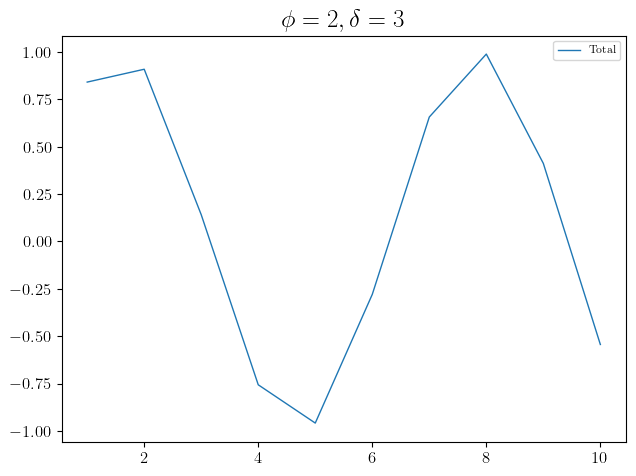

In [39]:
sizePair = [ 'Total', 'SS', r'SL', 'LL']
plt.plot(np.linspace(10,1,10),np.sin(np.linspace(10,1,10)),label= str(sizePair[0]))
plt.title(fr"$\phi = {2}, \delta = {3}$", fontsize=18)
plt.legend()
plt.show()

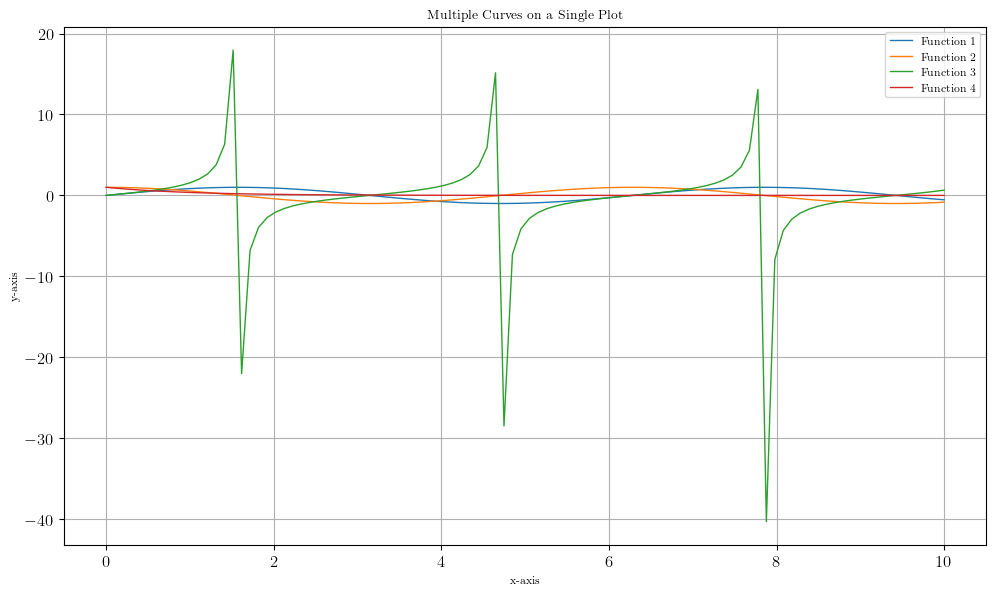

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the x-axis
x = np.linspace(0, 10, 100)

# Define four different functions to plot
functions = [
    lambda x: np.sin(x),
    lambda x: np.cos(x),
    lambda x: np.tan(x),
    lambda x: np.exp(-x)
]

# Plot each function using a for loop
plt.figure(figsize=(10, 6))
for i, func in enumerate(functions):
    y = func(x)
    plt.plot(x, y, label=f'Function {i+1}')

# Adding labels and title
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Multiple Curves on a Single Plot')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


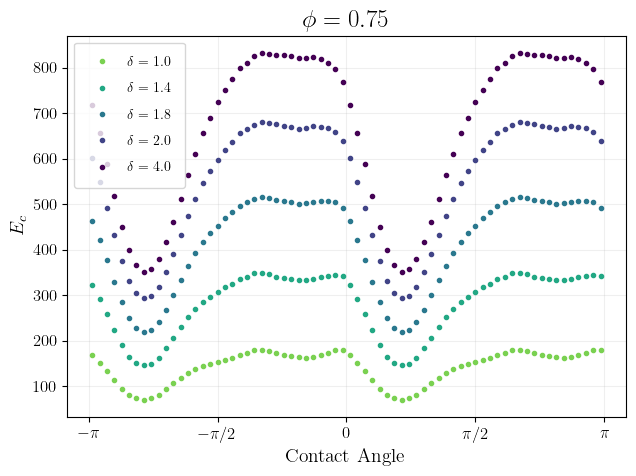

In [3]:
import os
import numpy as np
import random

topDir      = "/media/rahul/Rahul_2TB/high_bidispersity/"

ranSeedFile = "random_seed.dat"
intFile     = "int_random_seed_params_stress100r_shear.dat"
contFile    = 'contacts.txt'

NP          = [1000]

run         = {500:8,1000:4,2000:2,4000:1}

#phi         = [0.75]

ar          = [1.0, 1.4, 1.8, 2.0, 4.0]

plt.clf()
cmap = matplotlib.colormaps['viridis_r'] #color scheme

phii = 0.75

for ii in range(len(NP)):
        phii = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        #contactAngleAllRuns = []
        for k in range(len(ar)):
            contactAngleAllRuns = []
            dataname=topDir+'NP_'+str(NP[ii])+'/phi_'+phii+'/ar_'+str(ar[k])+'/Vr_0.5'
            if os.path.exists(dataname):
                for l in range (run[NP[ii]]):
                    ranFile = open(f'{dataname}/run_{l+1}/{ranSeedFile}', 'r')

                    if ar[k] == 1:
                        particleSize = [1]*(int(NP[ii]/2)) + [2]*(int(NP[ii]/2))
                        random.shuffle(particleSize)
                        #painting particles randomly in two colours for monodisperse case
                    else:
                        particleSize = np.loadtxt(ranFile,usecols=3) # reading only column 3 which has particle size
                        ranFile.close()

                    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

                    # reading interaction file
                    # storing the interactions for each timestep in a list
                    hashCounter=0
                    temp=[]
                    contactList=[] # list with interaction parameters for each element at each timestep

                    interFile = open(f'{dataname}/run_{l+1}/{intFile}', 'r')
                    fileLines = interFile.readlines()[27:] # skipping the comment lines
                    for line in fileLines:
                        if not line.split()[0] == '#':
                            lineList = [float(value) for value in line.split()]
                            temp.append(lineList)
                        else:
                            hashCounter += 1 # checking if counter reaches 7 (7 lines of comments after every timestep data)
                            if hashCounter == 7: 
                                contactList.append(np.array(temp))
                                temp = []
                                hashCounter = 0
                    interFile.close()

                    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

                    contactAngle = [] # total number of particles in frictional contacts
                    for sampleList in contactList:
                        timeStepContactAngle = [] # index of particles in contact
                        for i in range (sampleList.shape[0]):
                            if int(sampleList[i,10]) == 2:
                                thetaRad = np.arctan2(sampleList[i,4],sampleList[i,2])
                                timeStepContactAngle.append(thetaRad)
                                if thetaRad < 0:
                                    timeStepContactAngle.append(np.pi - abs(thetaRad))
                                else:
                                    timeStepContactAngle.append(thetaRad - np.pi)

                        contactAngle.append(timeStepContactAngle) # nested list of all contact angles

                    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

                    #for total contacts 
                    #conFile  = open(f'{dataname}/run_{l+1}/{contFile}', 'r')
                    #contData = np.loadtxt(conFile)
                    #conFile.close()
                    #zlist = [ a for a in contData[:,0]]

                    off = 100
                    contactAngleList = [i for sub in contactAngle[off:] for i in sub]
                    contactAngleAllRuns.append(contactAngleList)

                allContactAngles = [i for sub in contactAngleAllRuns for i in sub]
                counts, bin_edges = np.histogram(allContactAngles, bins = 70)
                bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
                # histogram using the count and bins
                plt.plot(bin_centers, counts/(len(contactAngle)-off), 'o', markersize=3, label=r'$\delta$' + f' = {ar[k]}',color=cmap((k+1)/len(ar))) 

xticks = [-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi]
xtick_labels = [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$']
plt.xticks(xticks, xtick_labels)
plt.title(fr"$\phi = {phii}$", fontsize=18)
plt.xlabel('Contact Angle', fontsize=14,fontstyle='italic')
plt.ylabel(r'$E_c$', fontsize=14,fontstyle='italic')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.legend(fontsize=10, labelspacing=1,borderpad=1)

plt.grid(which='Both', alpha=0.2)

plt.tight_layout()
if False:
    figFormat=".pdf"
    fig_save_path = "/home/rahul/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/figures"
    plt.savefig(fig_save_path+'/contactAngles_NP_'+str(1000)+'_phi_'+str(phii)+figFormat, bbox_inches="tight",dpi=500)

plt.show()

In [10]:
len(contactAngleAllRuns)

4

In [7]:
len(contactAngle[off:])

1900

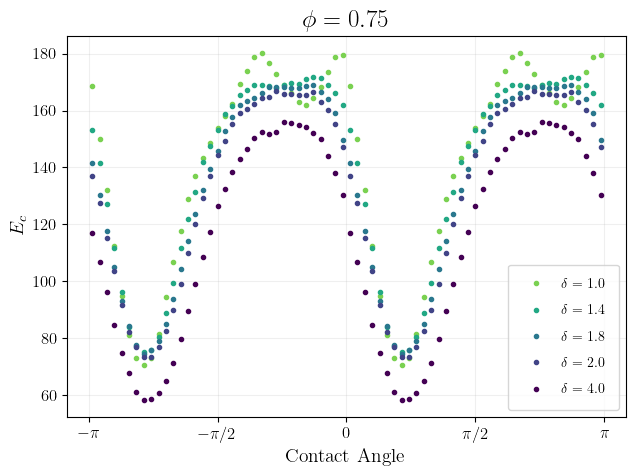

In [9]:
# correct one

import os
import numpy as np
import random

topDir      = "/media/rahul/Rahul_2TB/high_bidispersity/"

ranSeedFile = "random_seed.dat"
intFile     = "int_random_seed_params_stress100r_shear.dat"
contFile    = 'contacts.txt'

NP          = [1000]

run         = {500:8,1000:4,2000:2,4000:1}

#phi         = [0.75]

ar          = [1.0, 1.4, 1.8, 2.0, 4.0]

plt.clf()
cmap = matplotlib.colormaps['viridis_r'] #color scheme

phii = 0.75

for ii in range(len(NP)):
        phii = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        #contactAngleAllRuns = []
        for k in range(len(ar)):
            contactAngleAllRuns = []
            dataname=topDir+'NP_'+str(NP[ii])+'/phi_'+phii+'/ar_'+str(ar[k])+'/Vr_0.5'
            if os.path.exists(dataname):
                for l in range (run[NP[ii]]):
                    ranFile = open(f'{dataname}/run_{l+1}/{ranSeedFile}', 'r')

                    if ar[k] == 1:
                        particleSize = [1]*(int(NP[ii]/2)) + [2]*(int(NP[ii]/2))
                        random.shuffle(particleSize)
                        #painting particles randomly in two colours for monodisperse case
                    else:
                        particleSize = np.loadtxt(ranFile,usecols=3) # reading only column 3 which has particle size
                        ranFile.close()

                    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

                    # reading interaction file
                    # storing the interactions for each timestep in a list
                    hashCounter=0
                    temp=[]
                    contactList=[] # list with interaction parameters for each element at each timestep

                    interFile = open(f'{dataname}/run_{l+1}/{intFile}', 'r')
                    fileLines = interFile.readlines()[27:] # skipping the comment lines
                    for line in fileLines:
                        if not line.split()[0] == '#':
                            lineList = [float(value) for value in line.split()]
                            temp.append(lineList)
                        else:
                            hashCounter += 1 # checking if counter reaches 7 (7 lines of comments after every timestep data)
                            if hashCounter == 7: 
                                contactList.append(np.array(temp))
                                temp = []
                                hashCounter = 0
                    interFile.close()

                    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

                    contactAngle = [] # total number of particles in frictional contacts
                    for sampleList in contactList:
                        timeStepContactAngle = [] # index of particles in contact
                        for i in range (sampleList.shape[0]):
                            if int(sampleList[i,10]) == 2:
                                thetaRad = np.arctan2(sampleList[i,4],sampleList[i,2])
                                timeStepContactAngle.append(thetaRad)
                                if thetaRad < 0:
                                    timeStepContactAngle.append(np.pi - abs(thetaRad))
                                else:
                                    timeStepContactAngle.append(thetaRad - np.pi)

                        contactAngle.append(timeStepContactAngle) # nested list of all contact angles

                    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

                    #for total contacts 
                    #conFile  = open(f'{dataname}/run_{l+1}/{contFile}', 'r')
                    #contData = np.loadtxt(conFile)
                    #conFile.close()
                    #zlist = [ a for a in contData[:,0]]

                    off = 100
                    contactAngleList = [i for sub in contactAngle[off:] for i in sub]
                    contactAngleAllRuns.append(contactAngleList)

                allContactAngles = [i for sub in contactAngleAllRuns for i in sub]
                counts, bin_edges = np.histogram(allContactAngles, bins = 70)
                bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
                # histogram using the count and bins
                plt.plot(bin_centers, counts/(len(contactAngle)-off), 'o', markersize=3, label=r'$\delta$' + f' = {ar[k]}',color=cmap((k+1)/len(ar))) 

xticks = [-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi]
xtick_labels = [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$']
plt.xticks(xticks, xtick_labels)
plt.title(fr"$\phi = {phii}$", fontsize=18)
plt.xlabel('Contact Angle', fontsize=14,fontstyle='italic')
plt.ylabel(r'$E_c$', fontsize=14,fontstyle='italic')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)
plt.legend(fontsize=10, labelspacing=1,borderpad=1)

plt.grid(which='Both', alpha=0.2)

plt.tight_layout()
if False:
    figFormat=".pdf"
    fig_save_path = "/home/rahul/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/figures"
    plt.savefig(fig_save_path+'/contactAngles_NP_'+str(1000)+'_phi_'+str(phii)+figFormat, bbox_inches="tight",dpi=500)

plt.show()